# 03-1 k-최근접 이웃 회귀  
---

농어를 무게 단위로 가격을 책정하려고 하는데 무게를 잘못 측정한 상황  
그래서 무게를 에측하는 모델을 만드는 것이 혼공머신의 과제

## k-최근접 이웃 회귀  
---

지도학습은 **분류**와 **회귀**로 크게 나뉜다.

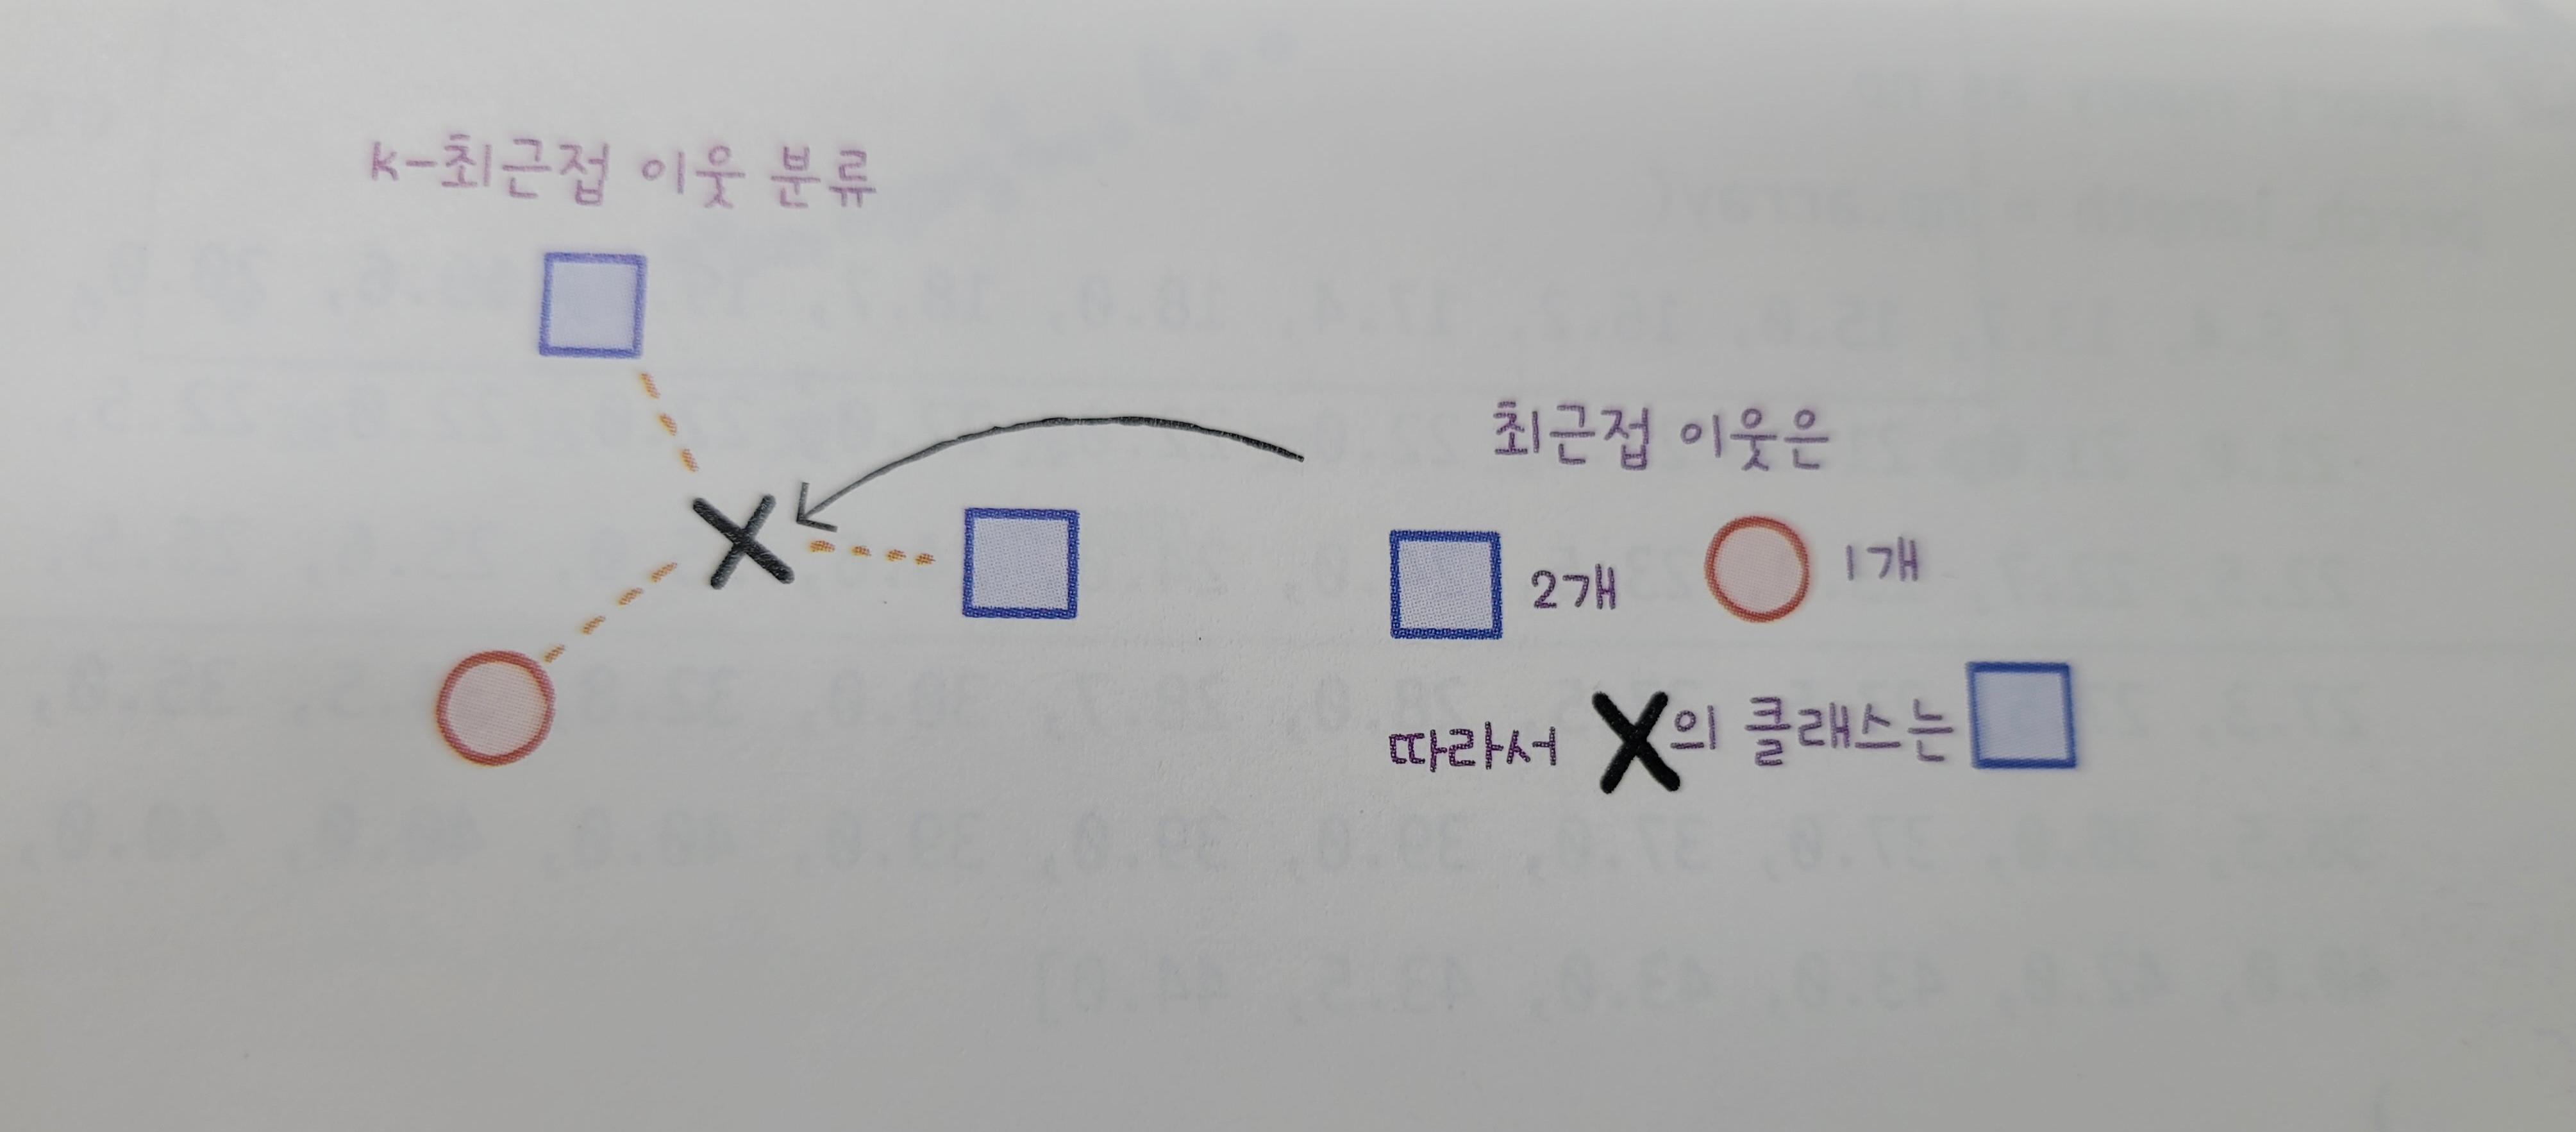

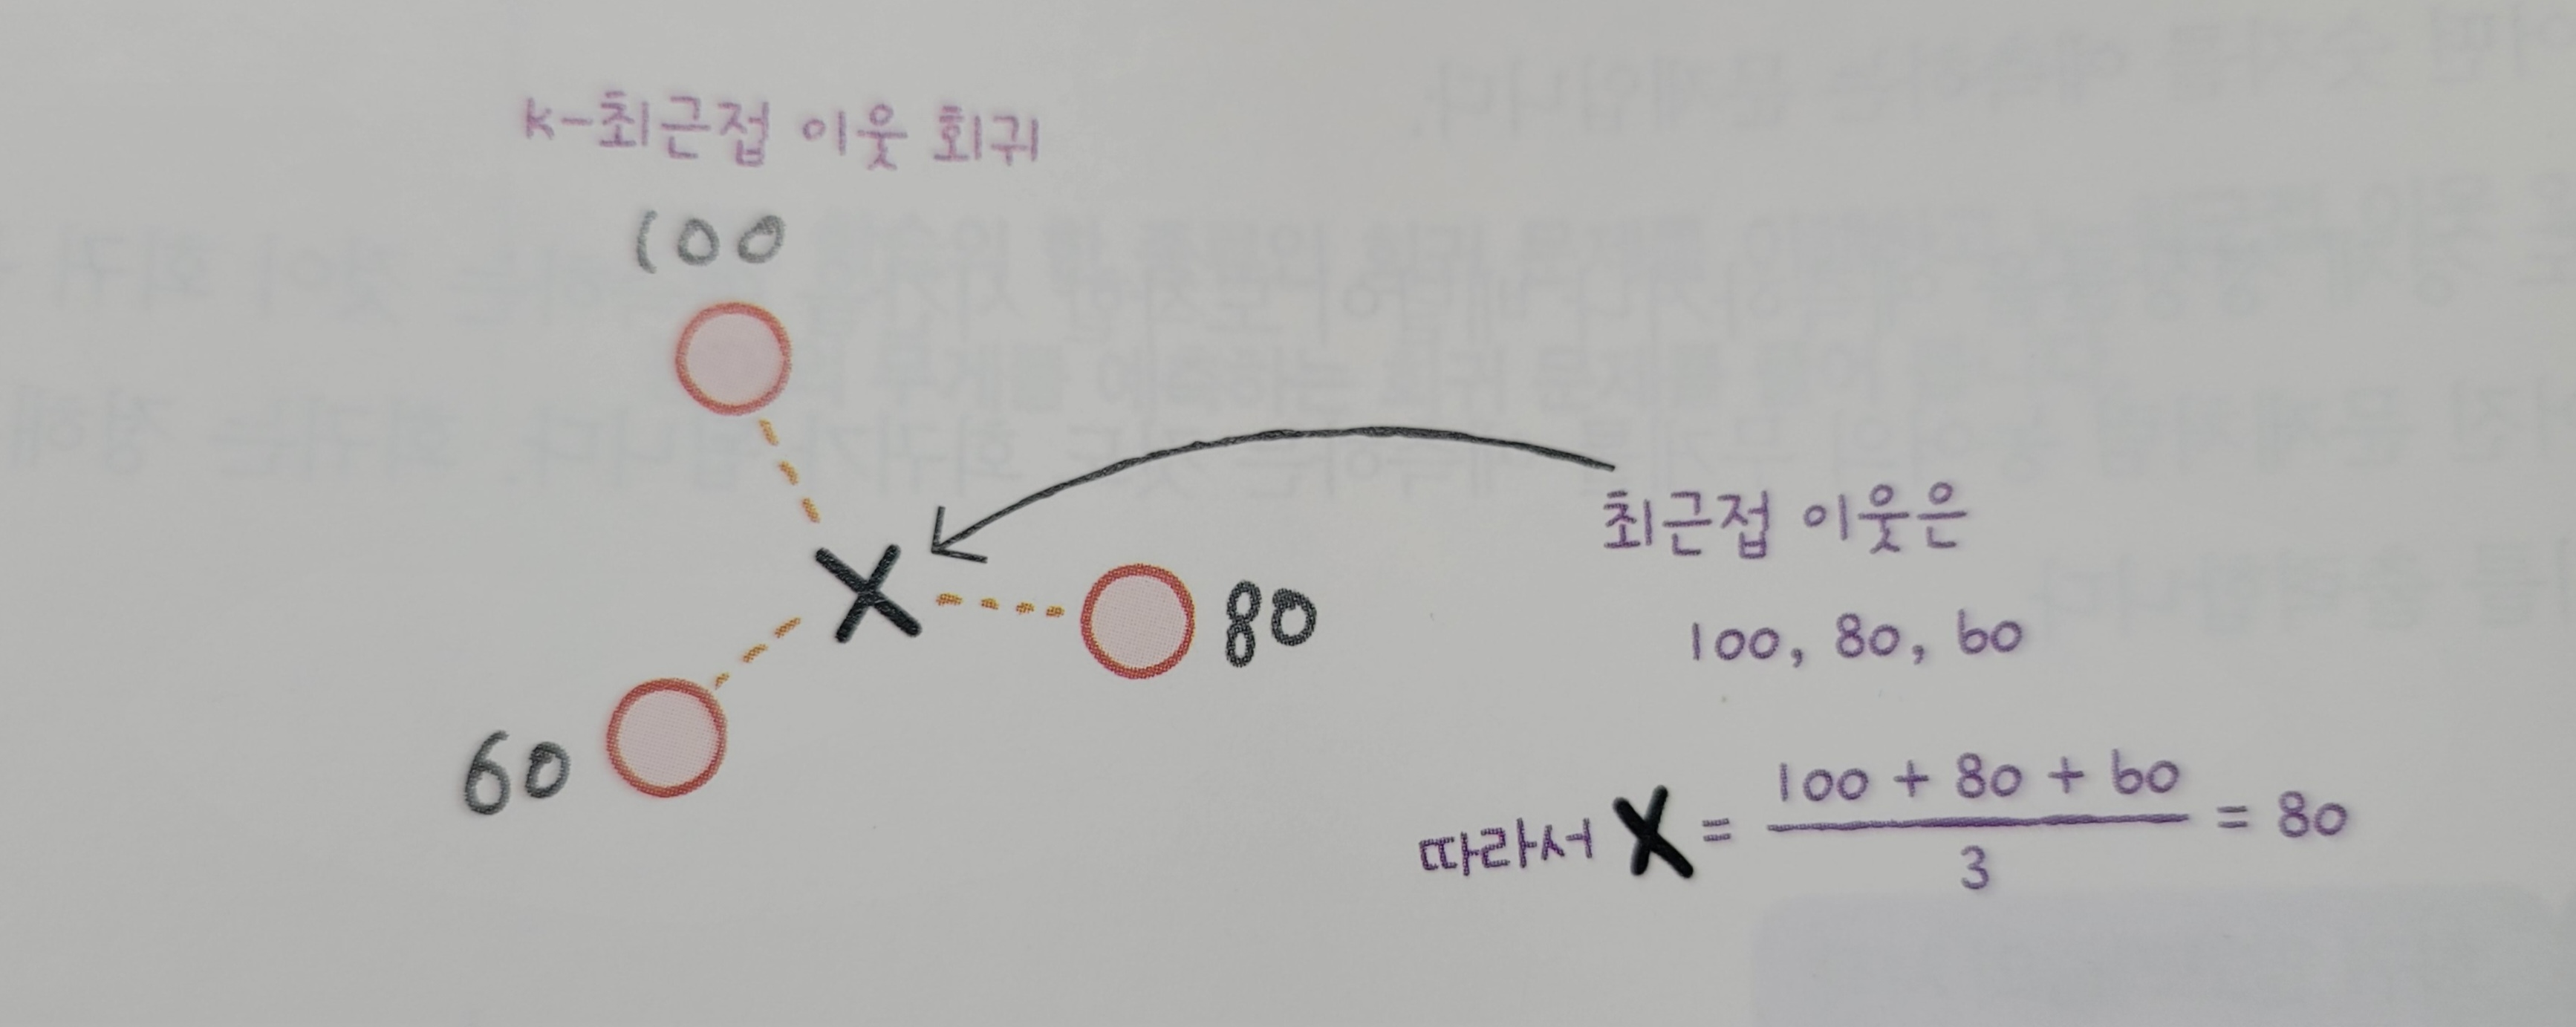

## 데이터 준비  
---

혼공머신은 길이만 있으면 잘 예측할 수 있다고 생각

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

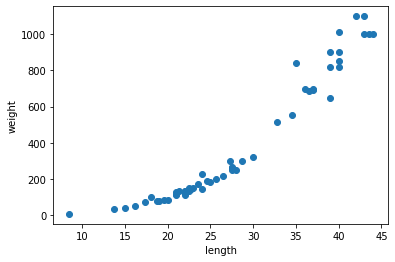

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 커짐에 따라 무게도 늘어난다

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


사이킷런의 훈련 세트는 2차원 배열이여야 한다. `reshape()`로 크기를 바꿀 수 있다.  
4 $\rightarrow$ 2 $\times$ 2

In [9]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [10]:
# 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러가 발생
# test_array = test_array.reshape(2, 3)

크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미  
첫 번째에 원소 개수, 두 번째에 1

In [11]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [12]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)  
---

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [15]:
knr.score(test_input, test_target)

0.992809406101064

$R^2 = \frac{\sum(타깃-예측)^2}{\sum(타깃-평균)^2}$  
예측이 타깃에 가까워지면 1이 가까운 값

타깃과 예측의 절대값 오차를 평균하여 반롼

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합  
---

모델을 훈련 세트로 훈련했기 때문에 보통 훈련 세트의 점수가 좋게 나온다.  
그런데 테스트 세트의 점수가 굉장히 나쁘면 **과대적합** 되었다고 말한다.  
반대로 테스트가 높거나 둘 다 낮으면 **과소적합** 되었다고 말한다.

In [18]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [19]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [20]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제  
---

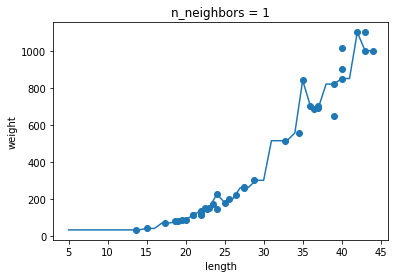

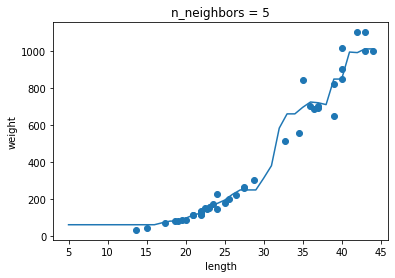

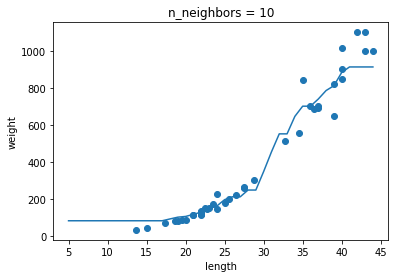

In [21]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()